In [0]:
import numpy as np
import matplotlib.pyplot as plt
 
from scipy import optimize, integrate
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

# Finite Difference Formulas

## Approximations to the First Derivative

구간 $[x_0,x_n]$을 일정한 간격 $h$로 나눈다.
$$x_{i+1} = x_i + h,\quad x_{i-1} = x_i - h$$

$u(x)$를 $x_{i+1}$과 $x_{i-1}$에서 Taylor 전개하면,
\begin{align*}
u(x_{i+1}) &= u(x_i + h) = u(x_i) + hu'(x_i) + \frac{h^2}{2!}u''(x_i) + \frac{h^3}{3!}u'''(x_i) + \cdots \\
u(x_{i-1}) &= u(x_i - h) = u(x_i) - hu'(x_i) + \frac{h^2}{2!}u''(x_i) - \frac{h^3}{3!}u'''(x_i) + \cdots
\end{align*}

$u_i=u(x_i)$, $u_{i+1} = u(x_{i+1})$, $u_{i-1} = u(x_{i-1})$으로 두면,
\begin{align*}
(1)\quad &u_{i+1} = u_i + hu'_i + \frac{h^2}{2!}u''_i + \frac{h^3}{3!}u'''_i + \cdots \\
(2)\quad &u_{i-1} = u_i - hu'_i + \frac{h^2}{2!}u''_i - \frac{h^3}{3!}u'''_i + \cdots 
\end{align*}

Forward difference: $(1)$로부터
$$u'_i = \frac{u_{i+1} - u_i}{h} + O(h)$$

Backward difference: $(2)$로부터
$$u'_i = \frac{u_{i} - u_{i-1}}{h} + O(h)$$

Central difference: $(1)-(2)$하고 정리하면
$$\boxed{u'_i = \frac{u_{i+1} - u_{i-1}}{2h} + O(h^2)}$$

2차 오차 $O(h^2)$를 갖는 forward difference를 구하기 위해,
\begin{align*}
u'_i &=au_{i} + bu_{i+1} + cu_{i+2} + O(h^2)\\
&= au_i + b\left(u_i + hu'_i + \frac{h^2}{2!}u''_i + \cdots\right) + c\left(u_i + 2hu'_i + \frac{4h^2}{2!}u''_i + \cdots\right)\\
&= (a+b+c)u_i + (b+2c)hu'_i + \left(\frac{b}{2}+c\right)h^2u''_i
\end{align*}

계수를 비교하면,
$$a+b+c = 0,\quad (b+2c)h = 1,\quad \left(\frac{b}{2} + c\right)h^2 = 0$$

연립방정식을 풀면,
$$a = -\frac{3}{2h},\quad b = \frac{2}{h},\quad c = -\frac{1}{2h}$$

대입하여 정리하면,
$$\boxed{u'_i = \frac{-3u_{i} + 4u_{i+1} - u_{i+2}}{2h} + O(h^2)}$$

마찬가지 방법으로 backward difference에 대해 구하면,
$$\boxed{u'_i = \frac{3u_{i-2} - 4u_{i-1} + u_{i}}{2h} + O(h^2)}$$

## Approximations to the Second Derivative

앞에서 구한 1차 도함수에 대한 결과를 이용하면
$$u''_i = \frac{u'_{i+1} - u'_{i}}{h} = \frac{1}{h}\left(\frac{u_{i+2}-u_{i+1}}{h} - \frac{u_{i+1} - u_{i}}{h}\right) = \frac{u_i - 2u_{i+1} + u_{i+2}}{h^2}$$

또는
\begin{align*}
u''_i &=au_{i} + bu_{i+1} + cu_{i+2} + O(h^2)\\
&= au_i + b\left(u_i + hu'_i + \frac{h^2}{2!}u''_i + \cdots\right) + c\left(u_i + 2hu'_i + \frac{4h^2}{2!}u''_i + \cdots\right)\\
&= (a+b+c)u_i + (b+2c)hu'_i + \left(\frac{b}{2}+c\right)h^2u''_i
\end{align*}

계수를 비교하면,
$$a+b+c = 0,\quad (b+2c)h = 0,\quad \left(\frac{b}{2} + c\right)h^2 = 1$$

연립방정식을 풀면,
$$a = \frac{1}{h^2},\quad b = -\frac{2}{h^2},\quad c = \frac{1}{h^2}$$

대입하여 정리하면,
$$\boxed{u''_i = \frac{u_i - 2u_{i+1} + u_{i+2}}{h^2} + O(h^2)}$$

마찬가지 방법으로 backward difference에 대해 구하면,
$$\boxed{u''_i = \frac{u_{i-2} - 2u_{i-1} + u_{i}}{h^2} + O(h^2)}$$

$u'_{i+1}$과 $u'_{i-1}$의 Taylor 전개식을 더하고 정리하면, $(1)+(2)$:
$$\boxed{u''_i = \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} + O(h^2)}$$

# Finite Difference Methods for Linear Poisson's Equations

## Tridiagonal Matrix Equations

$$\boxed{u''(x) = \alpha(x)u'(x) + \beta(x)u(x) + \gamma(x),\quad(x_0<x<x_n)}$$

$i=1,2,\cdots,n-1$일 때, 2nd order centarl difference를 이용하면,
$$\frac{u_{i+1}-2u_i+y_{i-1}}{h^2} = \alpha_i\frac{u_{i+1}-u_{i-1}}{2h} +
\beta_i u_i + \gamma_i$$

양변에 $h^2$을 곱하고 정리하면,
$$\boxed{\left(1+\frac{h\,\alpha_i}{2}\right)u_{i-1} + \left(-2 -h^2\beta_i\right)u_i + \left(1-\frac{h\,\alpha_i}{2}\right)u_{i+1} = h^2\gamma_i}$$

$$\boxed{a_i u_{i-1} + b_i u_i + c_i u_{i-1} = d_i}$$
여기서,
$$a_i = 1+\frac{h\,\alpha_i}{2},\quad b_i = -2 -h^2 \beta_i,\quad c_i = 1-\frac{h\,\alpha_i}{2},\quad d_i = h^2 \gamma_i$$

Tridiagonal 행렬로 나타내면,
$$\begin{pmatrix}
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&& & a_{n-1} & b_{n-1} & c_{n-1}
\end{pmatrix}
\begin{pmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \\ u_n \end{pmatrix} 
= \begin{pmatrix} d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \end{pmatrix}
$$

변수의 개수는 $n+1$이지만, 식의 개수는 $n-1$로 해를 구하기 위해서는 2개의 조건이 더 필요하다. 양 끝점 $x=x_0 (i=0)$과 $x=x_n (i=n)$에서의 경계조건을 통해 2개의 식을 추가한다.

## 2nd vs. 4th Order Accuracy FDM

$$\boxed{u'' = f(x),\quad(x_0<x<x_n)}$$

일반적으로 $x_i (i=1,2,\cdots,n-1$)에서 2차 오차해를 같는 해를 다음과 같이 구할 수 있다.
$$\frac{u_{i+1} -2u_i + u_{i-1}}{h^2} + O(h^2) = f(x_i)$$

양변에 $h^2$을 곱하면,
$$\boxed{u_{i+1} -2u_i + u_{i-1} = h^2f(x_i)}$$

특별히, $u''$이 $x$ 만의 함수일 때는 다음과 같은 테크닉을 이용해 4차 오차의 정확한 해를 구할 수 있다. 즉, Taylor 전개로부터 
\begin{align*}
u(x+h) &\simeq u(x) + hu'(x) + \frac{h^2}{2!}u''(x) + \frac{h^3}{3!}u'''(x) + \frac{h^4}{4!}u^{(4)}(x) + \cdots\\
u(x-h) &\simeq u(x) - hu'(x) + \frac{h^2}{2!}u''(x) - \frac{h^3}{3!}u'''(x) + \frac{h^4}{4!}u^{(4)}(x) + \cdots
\end{align*}

4차항까지 더하고 정리하면,
\begin{align*}
\frac{u(x+h)-2u(x)+u(x-h)}{h^2} 
&= u''(x) + \frac{h^2}{12}u^{(4)}(x) + O(h^4) \\
&= f(x) + \frac{h^2}{12}f''(x) + O(h^4)\\
&= \frac{f(x+h)+10f(x)+f(x-h)}{12}
\end{align*}

$x_i (i=1,2,\cdots,n-1$)에서
$$\boxed{u_{i+1}-2u_i+u_{i-1} = \frac{h^2}{12}\Bigl[f(x_{i+1})+10f(x_i)+f(x_{i-1})\Bigr]}$$

## Dirichlet Boundary Conditions

$$\boxed{\begin{cases}
u(x_0) = u_a, &(i=0)\\
u(x_n) = u_b, &(i=n)
\end{cases}}$$

Tridiagonal 행렬식 $(i=1, 2, \cdot, n-1)$에 대해
$$a_i u_{i-1} + b_i u_i + c_i u_{i-1} = d_i$$

$i=1$일 때,
$$a_1 u_{0} + b_1 u_1 + c_1 u_{2} = d_1,\quad\text{or}\quad b_1 u_1 + c_1 u_{2} = d_1 - a_1 u_{0}$$

$i=n-1$일 때,
$$a_{n-1} u_{n-2} + b_{n-1} u_{n-1} + c_{n-1} u_{n} = d_{n-1},\quad\text{or}\quad a_{n-1} u_{n-2} + b_{n-1} u_{n-1} = d_{n-1} - c_{n-1} u_{n}$$

두 경계값 $u_0=u_a$과 $u_n=u_b$을 대입한다.

### Matrix Type-1

2개의 경계조건을 적용하면, $(n-1)\times(n-1)$ 행렬식을 만들수 있다.
$$\begin{pmatrix}
b_1 & c_1  \\
a_2 & b_2 & c_2 &  \\
     & \ddots & \ddots & \ddots \\
& & a_{n-2} & b_{n-2} & c_{n-2} \\
&&& a_{n-1} & b_{n-1} 
\end{pmatrix}
\begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \end{pmatrix} 
= \begin{pmatrix} \boxed{d_1-a_1u_a} \\ d_2 \\ \vdots \\ d_{n-2} \\ \boxed{d_{n-1}-c_{n-1}u_b}\end{pmatrix}
$$

### Matrix Type-2

2개의 경계조건을 적용하면, $(n+1)\times(n+1)$ 행렬식을 만들수 있다.
$$\begin{pmatrix}
\boxed{1} &  \\
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&&& a_{n-1} & b_{n-1} & c_{n-1} \\
 &&&&&& \boxed{1}
\end{pmatrix}
\begin{pmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \\ u_n \end{pmatrix} 
= \begin{pmatrix} \boxed{u_a}\\ d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \\ \boxed{u_b}\end{pmatrix}
$$

**[Example]** 2차 미분방정식 $y''=-x(x+3)e^x$, $y(0)=0$, $y(1)=0$의 해를 구하시오. 실제 해는 $y(x) = -x(x-1)e^x$ 이다.

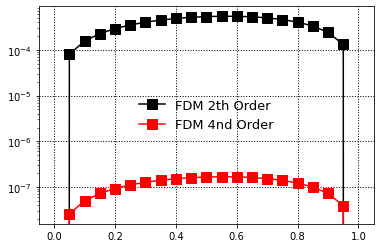

In [2]:
# y'' = f(x) = -x (x+3) exp(x), y(0) = 0, y(1) = 0
def f(x):  return -x*(x+3)*np.exp(x)
def ys(x): return -x*(x-1)*np.exp(x) # Anayltic solution

ua, ub = 0, 0
x, h = np.linspace(0, 1, 21, retstep=True)

ai = np.full(x.size - 2,  1)
bi = np.full(x.size - 2, -2)
ci = np.full(x.size - 2,  1)
diags = np.r_[ai, 0, 0], np.r_[1, bi, 1], np.r_[0, 0, ci]
tdm = spdiags(diags, [-1, 0, 1], x.size, x.size, format="csr")

# 2nd order accuracy
di = f(x[1:-1])*h**2
sol1 = spsolve(tdm, np.r_[ua, di, ub])

# 4th order accuracy
di = (f(x[2:]) + 10*f(x[1:-1]) + f(x[:-2]))*h**2/12
sol2 = spsolve(tdm, np.r_[ua, di, ub])

plt.semilogy(x, abs(ys(x) - sol1), 'ks-', ms=10, label="FDM 2th Order")
plt.semilogy(x, abs(ys(x) - sol2), 'rs-', ms=10, label="FDM 4nd Order")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

## Mixed Boundary Conditions

$$\boxed{\begin{cases}
p_0u(x_0) + q_0u'(x_0) = r_0, &(i=0)\\
p_nu(x_n) + q_nu'(x_n) = r_n, &(i=n)
\end{cases}}$$

### Matrix Type-1

$i=0$일 때, 1차 forward difference를 적용하면,
$$p_0u_0 + q_0\frac{u_1 - u_0}{h} = r_0,\quad\Rightarrow\quad u_0=\frac{r_0h - q_0u_1}{p_0h - q_0}$$

$i=n$일 때, 1차 backward difference를 적용하면,
$$p_nu_n + q_n\frac{u_n - u_{n-1}}{h} = r_n,\quad\Rightarrow\quad u_n = \frac{r_nh+q_nu_{n-1}}{p_nh+q_n}$$

경계조건을 적용하면,
$$\begin{pmatrix}
b_1 & c_1  \\
a_2 & b_2 & c_2 &  \\
     & \ddots & \ddots & \ddots \\
& & a_{n-2} & b_{n-2} & c_{n-2} \\
&&& a_{n-1} & b_{n-1} 
\end{pmatrix}
\begin{pmatrix} u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \end{pmatrix} 
= \begin{pmatrix} \boxed{d_1-a_1u_0} \\ d_2 \\ \vdots \\ d_{n-2} \\ \boxed{d_{n-1}-c_{n-1}u_n}\end{pmatrix}
$$


### Matrix Type-2

$i=0$일 때, 1차 forward difference를 적용하면,
$$p_0x_0 + q_0\frac{u_1 - u_0}{h} = r_0,\quad\Rightarrow\quad (p_0h-q_0)u_0 + q_0u_1 = r_0h$$

$i=n$일 때, 1차 backward difference를 적용하면,
$$p_nu_n + q_n\frac{u_n - u_{n-1}}{h} = r_n\quad\Rightarrow\quad -q_nu_{n-1} + (p_nh+q_n)u_1 = r_nh$$

2개의 경계조건을 적용하면,
$$\begin{pmatrix}
\boxed{p_0h_0-q_0} & \boxed{q_0} \\
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&&& a_{n-1} & b_{n-1} & c_{n-1} \\
 &&&&& \boxed{-q_n} & \boxed{p_nh_n+q_n}
\end{pmatrix}
\begin{pmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \\ u_n \end{pmatrix} 
= \begin{pmatrix} \boxed{r_0h_0}\\ d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \\ \boxed{r_nh_n}\end{pmatrix}
$$

### Matrix Type-3

$i=0$일 때, 2차 forward difference를 적용하면, ($h_0 = x_2 - x_0$)
$$p_0u_0 + q_0\frac{-3u_0 +4u_1- u_2}{h_0} = r_0 \quad\Rightarrow\quad \boxed{(p_0h_0-3q_0)u_0 + 4q_0u_1 -q_0u_2 = r_0h_0}
$$

$i=n$일 때, 2차 Backward difference를 적용하면, ($h_n = x_n - x_{n-2}$)
$$p_nu_n + q_n\frac{3u_n - 4u_{n-1} + u_{n-2}}{h_n} = r_n\quad\Rightarrow\quad \boxed{q_nu_{n-2} -4q_nu_{n-1}+ (p_nh_n+3q_n)u_n = r_nh_n}$$

2개의 경계조건을 적용하면,
$$\begin{pmatrix}
\boxed{p_0h_0-3q_0} & \boxed{4q_0} & \boxed{-q_0}\\
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&&& a_{n-1} & b_{n-1} & c_{n-1} \\
 &&&& \boxed{q_n} & \boxed{-4q_n} & \boxed{p_nh_n+3q_n}
\end{pmatrix}
\begin{pmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \\ u_n \end{pmatrix} 
= \begin{pmatrix} \boxed{r_0h_0}\\ d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \\ \boxed{r_nh_n}\end{pmatrix}
$$

In [0]:
# csr: Compressed Sparse Row
# lil: List of Lists

def solve_tdm(coeffs, x, bc_0, bc_n):
    ai, bi, ci, di = np.asfarray(coeffs)
    p0, q0, r0 = bc_0    # p0 u(x0) + q0 u'(x0) = r0
    pn, qn, rn = bc_n    # pn u(xn) + q0 u'(xn) = rn
    h0, hn = x[2] - x[0], x[-1] - x[-3]

    diags = np.r_[ai, 0, 0], np.r_[0, bi, 0], np.r_[0, 0, ci]
    tdm = spdiags(diags, [-1, 0, 1], x.size, x.size, format="lil")
    tdm[0, :3]   = p0*h0 - 3*q0, 4*q0, -q0  # BC @x = x0
    tdm[-1, -3:] = qn, -4*qn, pn*hn + 3*qn  # BC @x = xn
    rhs = np.r_[r0*h0, di, rn*hn]

    return spsolve(tdm.tocsr(), rhs) 

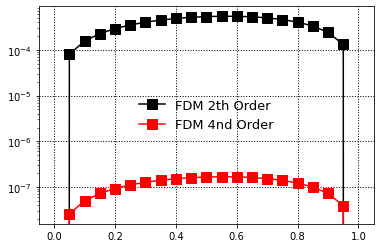

In [4]:
# y'' = f(x) = -x (x+3) exp(x), y(0) = 0, y(1) = 0
def f(x):  return -x*(x+3)*np.exp(x)
def ys(x): return -x*(x-1)*np.exp(x) # Anayltic solution

ua, ub = 0, 0
x, h = np.linspace(0, 1, 21, retstep=True)

ai = np.full(x.size - 2,  1)
bi = np.full(x.size - 2, -2)
ci = np.full(x.size - 2,  1)

# 2nd order accuracy
di = f(x[1:-1])*h**2
sol1 = solve_tdm([ai, bi, ci, di], x, (1, 0, ua), (1, 0, ub))

# 4th order accuracy
di = (f(x[2:]) + 10*f(x[1:-1]) + f(x[:-2]))*h**2/12
sol2 = solve_tdm([ai, bi, ci, di], x, (1, 0, ua), (1, 0, ub))

plt.semilogy(x, abs(ys(x) - sol1), 'ks-', ms=10, label="FDM 2th Order")
plt.semilogy(x, abs(ys(x) - sol2), 'rs-', ms=10, label="FDM 4nd Order")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

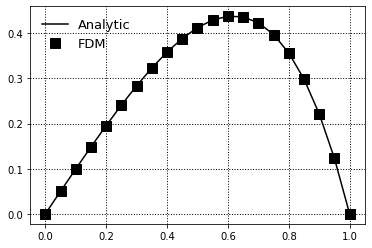

In [5]:
def f(x):  return -x*(x+3)*np.exp(x)
def ys(x): return -x*(x-1)*np.exp(x) # Anayltic solution

ua, ub = 0, 0
x, h = np.linspace(0, 1, 21, retstep=True)

ai = np.full(x.size - 2, 1)
bi = np.full(x.size - 2, -2)
ci = np.full(x.size - 2, 1)
di = f(x[1:-1])*h**2
sol = solve_tdm([ai, bi, ci, di], x, (1, 0, ua), (1, 0, ub))

plt.plot(x, ys(x), 'k', label="Analytic")
plt.plot(x, sol, 'ks', ms=10, label="FDM")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

### Matrix Type-4

$i=0$일 때, 2차 central difference를 적용하면,
$$a_0u_{-1}+b_0u_1 + c_0u_2 = d_0,\quad p_0u_0 + q_0\frac{u_1 - u_{-1}}{2h} = r_0$$

$u_{-1}$항을 소거하면,
$$(b_0q_0 + 2a_0p_0h)u_0 + q_0(c_0+a_0)u_1 = d_0q_0 + 2r_0h$$

$i=n$일 때, 2차 central difference를 적용하면,
$$a_nu_{n-1} + b_nu_{n} + c_nu_{n+1} = d_n,\quad p_nu_n + q_n\frac{u_{n+1} -  u_{n-1}}{2h} = r_n$$

$u_{n+1}$항을 소거하면,
$$q_n(a_n+c_n)u_{n-1} + (b_nq_n - 2c_np_nh)u_n = d_nq_n - 2r_nh$$

2개의 경계조건을 적용하면,
$$\begin{pmatrix}
\boxed{b'_0} & \boxed{c'_0}\\
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&&& a_{n-1} & b_{n-1} & c_{n-1} \\
 &&&&& \boxed{a'_n} & \boxed{b'_n}
\end{pmatrix}
\begin{pmatrix} u_0 \\ u_1 \\ u_2 \\ \vdots \\ u_{n-2} \\ u_{n-1} \\ u_n \end{pmatrix} 
= \begin{pmatrix} \boxed{d'_0}\\ d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \\ \boxed{d'_n}\end{pmatrix}
$$
여기서,
$$b_0' = b_0q_0 + 2a_0p_0h,\quad c_0' = q_0(c_0+a_0),\quad d'_0 = d_0q_0 + 2r_0h$$
그리고,
$$a_n' = q_n(a_n + c_n),\quad b_n' = b_nq_n - 2c_np_nh,\quad d'_n = d_nq_n - 2r_nh$$

$a_0, b_0, c_0, d_0$ 값들과 $a_n, b_n, c_n, d_n$ 값들이 필요하므로, $a_i, b_i, c_i, d_i$를 $i=0, 1, 2, \cdot, n$까지 확장한다.

## Variable Mesh Sizes

$$\frac{d}{dx}\left(k\frac{du}{dx}\right) + s = 0$$

$x_i$와 $x_{i+1}$의 중간값과 $x_{i-1}$와 $x_i$의 중간값을 정의하면,
$$x_{i+\frac{1}{2}} = \frac{1}{2}(x_{i+1}+x_i),\quad 
x_{i-\frac{1}{2}} = \frac{1}{2}(x_i+x_{i-1})$$

$x_i$에서의 2차 미분값은 
$$\left[\frac{d}{dx}\left(k\frac{du}{dx}\right)\right]_i \simeq \frac{\left(k\dfrac{du}{dx}\right)_{i+\frac{1}{2}} - \left(k\dfrac{du}{dx}\right)_{i-\frac{1}{2}}}{x_{i+\frac{1}{2}} - x_{i-\frac{1}{2}}} 
= \frac{k_{i+\frac{1}{2}}\dfrac{u_{i+1}-u_i}{x_{i+1}-x_{i}} - 
k_{i-\frac{1}{2}}\dfrac{u_i-u_{i-1}}{x_i-x_{i-1}}}{\dfrac{1}{2}(x_{i+1}-x_{i-1})}$$

$$\frac{k_{i+\frac{1}{2}}}{x_{i+1}-x_i}(u_{i+1}-u_i) - 
\frac{k_{i-\frac{1}{2}}}{x_i-x_{i-1}}(u_i-u_{i-1}) = -\dfrac{s_i}{2}(x_{i+1}-x_{i-1})$$

정리하면, $i = 1, 2, \cdots, n-1$일 때
$$a_i u_{i-1} + b_i u_i + c_i u_{i+1} = d_i$$
여기서,
$$a_i = \frac{k_{i-\frac{1}{2}}}{x_i-x_{i-1}},\quad c_i = \frac{k_{i+\frac{1}{2}}}{x_{i+1}-x_i},\quad b_i = -a_i -c_i,\quad d_i = -\dfrac{s_i}{2}(x_{i+1}-x_{i-1})$$

**[Example] 1D Heat Conduction**

$$\frac{d}{dx}\left(k\frac{du}{dx}\right) + s = 0,\quad u(0) = 0,\quad u(1) = 0$$

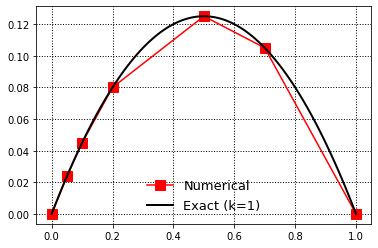

In [6]:
x = np.r_[0, 0.05, 0.1, 0.2, 0.5, 0.7, 1.0] # Mesh
u0, un = 0, 0               # Boundary conditions
k = np.r_[1, 1, 1, 1, 1, 1] # Material property
s = np.ones(x.size)         # Source s[i] = f(x[i])

# Tridiagonal matrix & Dirichlet bc
ai = k[:-1]/(x[1:-1] - x[:-2])
ci = k[1:]/(x[2:] - x[1:-1])
bi = - ai - ci
diags = np.r_[ai, 0, 0], np.r_[1, bi, 1], np.r_[0, 0, ci]
mat = spdiags(diags, [-1,0,1], x.size, x.size, format="csr")

di = -0.5*s[1:-1]*(x[2:] - x[:-2])
rhs   = np.r_[ua, di, ub]

sol = spsolve(mat, rhs)
plt.plot(x, sol, 'rs-', ms=10, label="Numerical")

x_ = np.linspace(0, 1, 101)
plt.plot(x_, -0.5*x_*(x_-1), 'k', lw=2, label="Exact (k=1)")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

# Linearization of Nonlinear Poisson's Equations

$$\boxed{u'' = f(x, u, u'),\quad (x_0<x<x_n)}$$
경계조건:
$$\left\{\begin{aligned}
p_0 u(x_0) + u'(x_0) &= r_0, &(x=x_0)\\
p_n u(x_n) + u'(x_n) &= r_n, &(x=x_n)
\end{aligned}\right.$$

**[Example]** 비선형 Poisson's equation의 해를 구하시오.
$$y''(x) = \frac{3}{2}y^2,\quad y(0) = 4,\quad y(1) = 1\quad\Rightarrow\quad y(x) = \frac{4}{(1 + x)^2}$$

In [0]:
def func(u):  return 1.5*u**2
def dfunc(u): return 3*u
def us(x):    return 4/(1 + x)**2 # Analytic solution

## Picard's Linearization

$$u'' = f(u)\quad\Longrightarrow\quad \frac{u^{k+1}_{i+1}-2u^{k+1}_i+u^{k+1}_{i-1}}{h^2} = f(u^{k+1}_i)\simeq f(u^k_i)\frac{u_i^{k+1}}{u_i^k}$$
정리하면,
$$u^{k+1}_{i-1}+\Bigl[-2-h^2f(u^k_i)/u_i^k\Bigl]u^{k+1}_i + u^{k+1}_{i+1} = 0$$

# of iterations >>  10


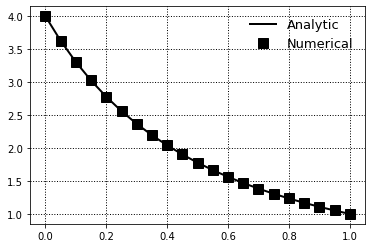

In [8]:
def update(u, x):
    hi, ui, n = x[1:-1] - x[:-2], u[1:-1], x.size
    fi = func(ui)

    # ai u[i-1] + bi u[i] + ci u[i+1] = di
    ai = np.ones(n-2)
    bi = -2 - (fi/ui)*hi**2
    ci = np.ones(n-2)
    di = np.zeros(n-2)

    return solve_tdm([ai, bi, ci, di], x, (1, 0, 4), (1, 0, 1))

x = np.linspace(0, 1, 21)  # Mesh
u0 = np.ones_like(x)*0.01

for k_iter in range(100):
    u = update(u0, x)
    if np.allclose(u, u0): break
    else: u0 = u

print("# of iterations >> ", k_iter+1)
plt.plot(x, us(x), 'k', lw=2, label="Analytic")
plt.plot(x, u, 'ks', ms=10, label="Numerical")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

## Newton's Linearization

$$u'' = f(u)\quad\Longrightarrow\quad \frac{u^{k+1}_{i+1}-2u^{k+1}_i+u^{k+1}_{i-1}}{h^2} = f(u_i^{k+1})$$

$u_i^{k+1} = u_i^k + \Delta u_i$라고 두고, Taylor 전개하면,
$$ f(u_i^{k+1}) \simeq f(u^k_i) + f'(u^k_i)\Delta u_i = f(u^k_i) + f'(u^k_i)(u^{k+1}_i-u^k_i)$$

정리하면,
$$\boxed{u^{k+1}_{i-1}+\Bigl[-2-f'(u^k_i)h^2\Bigl]u^{k+1}_i + u^{k+1}_{i+1} = \Bigl[f(u^k_i) - f'(u^k_i)\,u^k_i\Bigl]h^2}$$

# of iterations >>  5


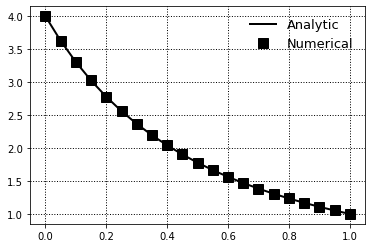

In [9]:
def update(u, x):
    hi, ui, n = x[1:-1] - x[:-2], u[1:-1], x.size
    fi, dfi = func(ui), dfunc(ui)

    # ai u[i-1] + bi u[i] + ci u[i+1] = di
    ai = np.ones(n-2)
    bi = -2 - dfi*hi**2
    ci = np.ones(n-2)
    di = (fi - dfi*ui)*hi**2

    return solve_tdm([ai, bi, ci, di], x, (1, 0, 4), (1, 0, 1))

x = np.linspace(0, 1, 21)  # Mesh
u0 = np.ones_like(x)*0.01  # Initial guess

for k_iter in range(1000):
    u = update(u0, x)
    if np.allclose(u, u0): break
    else: u0 = u

print("# of iterations >> ", k_iter+1)
plt.plot(x, us(x), 'k', lw=2, label="Analytic")
plt.plot(x, u, 'ks', ms=10, label="Numerical")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

## Linearization on Incremental Form

**1. $i = 1, 2, \cdots, n-1$ 일 때:**

$$u'' = f(u)\quad\Longrightarrow\quad \frac{u_{i-1}^{k+1} - 2u_i^{k+1} + u_{i+1}^{k+1}}{h^2} = f(u_i^{k+1})$$

$u^{k+1} = u^k + \delta u$라고 두고 대입하면, 좌변과 우변은
$$\frac{u_{i-1}^{k+1} - 2u_i^{k+1} + u_{i+1}^{k+1}}{h^2} = \frac{u_{i-1}^k - 2u_i^k + u_{i+1}^k}{h^2} + \frac{(\delta u)_{i-1}^k - 2(\delta u)_i^k + (\delta u)_{i+1}^k}{h^2}$$

$$ f(u_i^{k+1}) = f(u_i^k + \delta u_i) \simeq f(u_i^k) + f'(x_i^k)(\delta u)_i$$

정리하면,
$$\boxed{(\delta u)_{i-1} + \Bigl[-2 - f'(u_i^k)h^2\Bigl](\delta u)_i + (\delta u)_{i+1} = f(u_i^k)h^2 -\Bigl(u_{i-1}^k -2u_i^k + u_{i+1}^k\Bigl)}$$

Tridiagonal 행렬식으로 나타내면,
$$a_i(\delta u)_{i-1} + b_i(\delta u)_i + c_i(\delta u)_{i+1} = d_i$$
여기서,
$$a_i = c_i = 1,\quad b_i = -2 - f'(u_i^k)h^2,\quad d_i = f(u_i^k)h^2 -\Bigl(u_{i-1}^k -2u_i^k + u_{i+1}^k\Bigl)$$

$n+2$개의 변수에 대한 $n-1$개의 식을 나타낸다.
$$\begin{pmatrix}
a_1 & b_1 & c_1  \\
    & a_2 & b_2 & c_2 &  \\
    &     & \ddots & \ddots & \ddots \\
 && & a_{n-2} & b_{n-2} & c_{n-2} \\
 &&& & a_{n-1} & b_{n-1} & c_{n-1}
\end{pmatrix}
\begin{pmatrix} (\delta u)_0 \\ (\delta u)_1 \\ (\delta u)_2 \\ \vdots \\ (\delta u)_{n-2} \\ (\delta u)_{n-1} \\ (\delta u)_n \end{pmatrix} 
= \begin{pmatrix} d_1 \\ d_2 \\ \vdots \\ d_{n-2} \\ d_{n-1} \end{pmatrix}
$$
경계조건을 적용하여 2개의 식을 추가한다.

**2. $i=0$일 때, 경계조건을 적용하면**

$$p_0u(x_0) + q_0u'(x_0) = r_0$$

- 1st order forward difference:
$$p_0 u_0^{k+1} + q_0 \frac{u_1^{k+1}-u_0^{k+1}}{h_0} = r_0,\quad h_0 = x_1-x_0$$
정리하면
$$\boxed{(p_0h_0-q_0)(\delta u)_0 + q_0 (\delta u)_1 = r_0h_0 - (p_0h_0-q_0)u_0^k - q_0u_1^k}$$

- 2nd order forward difference:
$$p_0 u_0^{k+1} + q_0 \frac{-3u_0^{k+1} + 4u_1^{k+1} -u_2^{k+1}}{h_0} = r_0,\quad h_0 = x_2-x_0$$
정리하면
$$\boxed{(p_0h_0-3q_0)(\delta u)_0 + 4q_0 (\delta u)_1 -q_0(\delta u)_2  = r_0h_0 - (p_0h_0-3q_0)u_0^k - 4q_0u_1^k + q_0u_2^k}$$

**3. $i=n$일 때, 경계조건을 적용하면,**

$$p_nu(x_n) + q_nu'(x_n) = r_n$$

- 1st order backward difference:
$$p_n u_n^{k+1} + q_n \frac{u_n^{k+1}-u_{n-1}^{k+1}}{h_n} = r_0,\quad h_n = x_n-x_{n-1}$$
정리하면
$$\boxed{-q_0(\delta u)_{n-1} + (p_nh_n+q_n)(\delta u)_n = r_nh_n + q_0u_{n-1}^k - (p_0h_0+q_0)u_n^k}$$

- 2nd order backward difference:
$$p_n u_n^{k+1} + q_n \frac{3u_{n-2}^{k+1}-4u_{n-1}^{k+1} + u_n^{k+1}}{h_n} = r_0,\quad h_n = x_n-x_{n-2}$$
정리하면
\begin{align*}
\boxed{q_n(\delta u)_{n-2} -4q_n(\delta u)_{n-1} + (p_nh_n+3q_n)(\delta u)_n 
= r_nh_n - q_nu_{n-2}^k +4q_0 u_{n-1}^{k} - (p_0h_0+3q_0)u_n^k}
\end{align*}

# of iterations >>  5


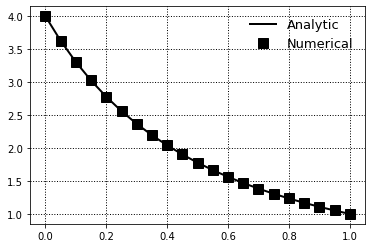

In [10]:
def update(u, x):
    hi, ui, n = x[1:-1] - x[:-2], u[1:-1], u.size
    fi, dfi = func(ui), dfunc(ui)

    # ai u[i-1] + bi u[i] + ci u[i+1] = di
    ai = np.ones(n-2)
    bi = -2 - dfi*hi**2
    ci = np.ones(n-2)
    di = fi*hi**2 - u[:-2] + 2*u[1:-1] - u[2:]

    diags = np.r_[ai, 0, 0], np.r_[0, bi, 0], np.r_[0, 0, ci]
    mat = spdiags(diags, [-1, 0, 1], n, n)
    rhs = np.r_[0, di, 0]

    # Set boundary conditions:
    mat = mat.tolil()
    mat[0,0], mat[-1,-1] = 1, 1
    rhs[0], rhs[-1] = 4 - u[0], 1 - u[-1]
    
    return spsolve(mat.tocsr(), rhs)

x = np.linspace(0, 1, 21) # Mesh
u0 = np.ones_like(x)*0.01 # Initial guess

for k_iter in range(100):
    u = u0 + update(u0, x)
    if np.allclose(u, u0): break
    else: u0 = u

print("# of iterations >> ", k_iter+1); 
plt.plot(x, us(x), 'k', lw=2, label="Analytic")
plt.plot(x, u, 'ks', ms=10, label="Numerical")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

## Quasi-linearization

$$u'' = f(x,u,u')\quad\Longrightarrow\quad g(x, u, u', u'') = u'' - f$$

$$\delta u = u^{k+1}-u^k,\quad \delta u' = (u')^{k+1}-(u')^k,\quad \delta u'' = (u'')^{k+1}-(u'')^k$$
일 때, Taylor 전개를 통해
\begin{align*}
g(x, u^{k+1}, (u')^{k+1}, (u'')^{k+1}) & = g(x, u^{k}+(\delta u)^k, (u')^{k}+(\delta u')^k, (u'')^{k}+(\delta u'')^k)\\
&= g(x, u^{k}, (u')^{k}, (u'')^{k}) + \left(\frac{\partial g}{\partial u}\right)^k\delta u \\
&\quad + \left(\frac{\partial g}{\partial u'}\right)^k(\delta u')^k + \left(\frac{\partial g}{\partial u''}\right)^k(\delta u'')^k
\end{align*}

$k\to\infty$일 때,
$$g(x, u^{k+1}, (u')^{k+1}, (u'')^{k+1}) \simeq g(x, u^{k}, (u')^{k}, (u'')^{k})$$
따라서,
$$\left(\frac{\partial g}{\partial u}\right)^k\delta u + \left(\frac{\partial g}{\partial u'}\right)^k(\delta u')^k + \left(\frac{\partial g}{\partial u''}\right)^k(\delta u'')^k = 0$$
여기서,
$$\left(\frac{\partial g}{\partial u}\right)^k = -\left(\frac{\partial f}{\partial u}\right),\quad
\left(\frac{\partial g}{\partial u'}\right)^k = -\left(\frac{\partial f}{\partial u'}\right),\quad
\left(\frac{\partial g}{\partial u''}\right)^k = 1$$
따라서,
$$\Longrightarrow\quad\boxed{(\delta u'')^k = \left(\frac{\partial f}{\partial u}\right)^k\delta u + \left(\frac{\partial f}{\partial u'}\right)^k(\delta u')^k
}$$

Taylor 전개를 통해,
\begin{align*}
(u'')^{k+1} &= (u'')^k + (\delta u'')^k = (u'')^k + \left(\frac{\partial f}{\partial u}\right)^k\delta u + \left(\frac{\partial f}{\partial u'}\right)^k(\delta u')^k\\
& = f(x, u^k, (u')^k) + \left(\frac{\partial f}{\partial u}\right)^k\Bigl[u^{k+1} - u^k\Bigl] + \left(\frac{\partial f}{\partial u'}\right)^k\Bigl[(u')^{k+1} - (u')^k\Bigl]
\end{align*}

또한, 2nd order central difference를 이용하면
$$(u'')^{k+1} = \frac{u_{i+1}^{k+1} -2u_i^{k+1} + u_{i-1}^{k+1}}{h^2},\quad
(u')^{k+1} = \frac{u_{i+1}^{k+1} - u_{i-1}^{k+1}}{2h}$$

정리하면,
\begin{align*}
\left[1 + \frac{h}{2}\left(\frac{\partial f}{\partial u'}\right)_i^k\right]u^{k+1}_{i-1} + \left[-2-h^2\left(\frac{\partial f}{\partial u}\right)_i^k\right]u^{k+1}_i + \left[1 - \frac{h}{2}\left(\frac{\partial f}{\partial u'}\right)_i^k\right]u^{k+1}_{i+1} \\
= \left[f(x_i, u^k_i, (u')_i^k) - \left(\frac{\partial f}{\partial u}\right)_i^k u^k_i - \left(\frac{\partial f}{\partial u'}\right)_i^k(u')_i^k \right]h^2
\end{align*}

**[Example]** 비선형 Poisson's equation의 해를 구하시오.

$$y'' = -3yy',\quad y(0) = 0,\quad y(2) = 1$$

# of iterations >>  5


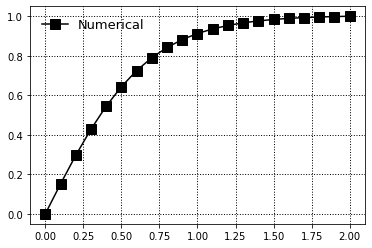

In [11]:
def func(x, u, du):  return -3*u*du
def dfdu1(x, u, du): return -3*du     # df/du
def dfdu2(x, u, du): return -3*u      # df/du'

def update(u, x):
    hi, ui, n = x[1:-1] - x[:-2], u[1:-1], x.size
    dui = (u[2:] - u[:-2])/(x[2:] - x[:-2])
    fi  = func(x,  ui, dui)
    df1 = dfdu1(x, ui, dui)
    df2 = dfdu2(x, ui, dui)

    ai = 1 + 0.5*df2*hi
    bi = -2 - df1*hi**2
    ci = 1 - 0.5*df2*hi
    di = (fi - df1*ui - df2*dui)*hi**2

    return solve_tdm([ai, bi, ci, di], x, (1, 0, 0), (1, 0, 1))

x = np.linspace(0, 2, 21)  # Mesh
u0 = np.ones_like(x)*0.01  # Initial guess

for k_iter in range(1000):
    u = update(u0, x)
    if np.allclose(u, u0): break
    else: u0 = u

print("# of iterations >> ", k_iter+1)
plt.plot(x, u, 'ks-', ms=10, label="Numerical")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

# Shooting Methods

## Dirichlet Boundary Condtions

$$u'' = f(x, u, u'),\quad u(x_0)=u_0,\quad u(x_n)=u_n$$

양끝값이 주어진 경계값 문제에서 한쪽 경계에서의 기울기 $u'(x_0)=s$로 가정하면 초기치 문제가 된다. 즉,
$$u''=f(x, u,u'),\quad u(x_0)=u_0,\quad u'(x_0)=s$$

$u'(x_0)=s$라 두고 초기치 문제를 적분해서 구한 $u(x_n)$의 값이 주어진 $u_n$의 값과 같은지 비교한다.

Residue 함수 $\mathrm{res}(s)$를 $s$로부터 계산한 $u(x_n)$과 주어진 $u_n$의 차로 정의하고, $\mathrm{res}(s)=0$를 만족하는 근을 구한다.

## Mixed Boundary Conditions

$$u'' = f(x, u, u'),\quad (x_0<x<x_n)$$
경계조건:
$$\left\{\begin{aligned}
p_0 u(x_0) + u'(x_0) &= r_0, &(x=x_0)\\
p_n u(x_n) + u'(x_n) &= r_n, &(x=x_n)
\end{aligned}\right.$$

한쪽 경계 $x = x_0$에서 $u(x_0)$ 또는 $u'(x_0)$ 둘 중 하나를 가정하면 나머지는 경계조건으로부터 정해진다.

예를 들어, $u(x_0) = s$라고 두면, 초기치 문제가 된다.
$$u''=f(x, u,u'),\quad u(x_0)=s,\quad u'(x_0) = r_0 - p_0 s$$

Residue 함수 $\mathrm{res}(s)$를 $x = x_n$에서의 계산된 $u(x_n)$과 $u'(x_n)$에서 계산된 경계조건으로 정의하고, $\mathrm{res}(s)=0$를 만족하는 근을 구한다.

이 때, $u'(x_n)$의 값은 Backward difference로 구할 수 있다.
$$u'(x_n) = \frac{3u_{n} - 4u_{n-1} + 3u_{n-2}}{2h} + O(h^2),\quad
u'(x_n) = \frac{u_{n} - u_{n-1}}{h} + O(h)$$

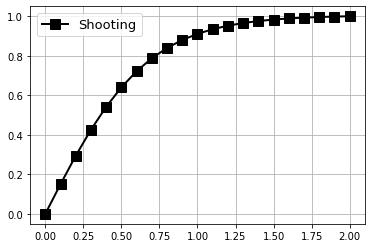

In [12]:
# # y'' = -3 y y', y(0) = 0, y(2) = 1 (scipy.integrate.odeint)
def f(u, x):
    y, dy = u
    return dy, -3*y*dy

def res(dya, ya, yb): # Residual
    return yb - integrate.odeint(f, [ya, dya], x)[-1, 0]

ya, yb = 0, 1
x = np.linspace(0, 2, 21)
dya = optimize.newton(res, 0.1, args=(ya, yb)) # Initial guess = 0.1
sol = integrate.odeint(f, [ya, dya], x)[:, 0]
plt.plot(x, sol, 'ks-',  lw=2, ms=10,  label="Shooting")
plt.legend(fontsize=13); plt.grid()

# Solving Systems of Nonlinear Equations

$$\boxed{u'' = f(x, u, u'),\quad (x_0<x<x_n)}$$

$x = x_i$에서 2차 오차의 Central difference를 이용하면 (이 때, $i=1,2,\cdots,n-1$),
$$\frac{u_{i+1}-2u_i+u_{i-1}}{h^2} = f\left(x, u_i,\frac{u_{i+1}-u_{i-1}}{2h}\right)$$

## Dirichlet Boundary Conditions

$$u(x_0) = u_a,\quad u(x_n) = u_b$$

양 끝에서의 경계값을 포함하면 $n+1$개의 비선형 연립방정식을 만들 수 있다.
$$\boxed{\begin{cases}\displaystyle
u_0 - u_a = 0, &i=0\\
\dfrac{y_{i+1}-2y_i+y_{i-1}}{h^2} - f\left(y_i,\dfrac{y_{i+1}-y_{i-1}}{2h},x_i\right) =0, & i=1,2,\cdots,n-1\\
u_n - u_b = 0, & i = n
\end{cases}}$$

적당한 초기값 $u_0$를 가정해서 비선형 Solver인 `optimize.fsolve()` 또는 `optimize.root()`를 이용해 해를 구할 수 있다.

## Mixed Boundary Conditions

$$\left\{\begin{aligned}
p_0 u(x_0) + u'(x_0) &= r_0\\
p_n u(x_n) + u'(x_n) &= r_n
\end{aligned}\right.$$

$x=x_0$에서 2차 Forward difference 그리고 $x=x_n$에서 2차 Backward difference를 이용하면 $n+1$개의 비선형 연립방정식을 만들 수 있다.

$$\boxed{\begin{cases}\displaystyle
p_0 u_0 + q_0\frac{-3u_0 +4u_1- u_2}{h_0} - r_0 = 0, &i=0\\
\dfrac{y_{i+1}-2y_i+y_{i-1}}{h^2} - f\left(y_i,\dfrac{y_{i+1}-y_{i-1}}{2h},x_i\right) =0, & i=1,2,\cdots,n-1\\
p_nu_n + q_n\dfrac{3u_n - 4u_{n-1} + u_{n-2}}{h_n} - r_n = 0, & i = n
\end{cases}}$$
여기서,
$$h_0 = x_2 - x_0,\quad h_n = x_n - x_{n-2}$$

적당한 초기값 $u_0$를 가정해서 비선형 Solver인 `optimize.fsolve()` 또는 `optimize.root()`를 이용해 해를 구할 수 있다.

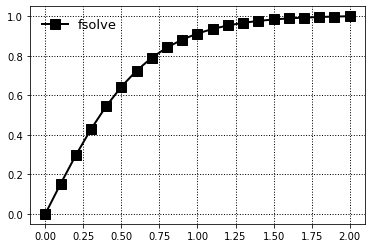

In [13]:
# # y'' = -3 y y', y(0) = 0, y(2) = 1 (scipy.optimize.fsolve)
def f(x, u, du):
    return -3*u*du

def eqns(u, a, b): 
    hi, xi = x[1:-1] - x[:-2], x[1:-1]
    ui = u[1:-1]
    dui = (u[2:] - u[:-2])/hi/2
    d2ui = (u[:-2] - 2*u[1:-1] + u[2:])/hi**2

    # System of nonlinear equations
    res = np.empty_like(u)
    res[0] = u[0] - a
    res[1:-1] = d2ui - f(xi, ui, dui)
    res[-1] = u[-1] - b
    return res

x  = np.linspace(0, 2, 21)
u0 = np.zeros_like(x) # Initial guess
sol3 = optimize.fsolve(eqns, u0, args=(0, 1))

plt.plot(x, sol3, 'ks-', lw=2, ms=10, label="fsolve")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

# General BVP Solver `scipy.integrate.solve_bvp`

$$\boxed{u'' = f(x, u, u'),\quad (x_0<x<x_n)}$$
경계조건:
$$\left\{\begin{aligned}
p_0 u(x_0) + u'(x_0) &= r_0, &(x=x_0)\\
p_n u(x_n) + u'(x_n) &= r_n, &(x=x_n)
\end{aligned}\right.$$

`scipy`에서 제공하는 범용 2-point BVP solver로 Matlab의 `bvp4c`와 동일하다.

```python
scipy.integrate.solve_bvp(fun, bc, x, y, p=None, S=None, fun_jac=None, 
        bc_jac=None, tol=0.001, max_nodes=1000, verbose=0)
```


In [14]:
# y'' = -3 y y', y(0) = 0, y(2) = 1 (scipy.integrate.solve_bvp)
def f(x, u):
    y, dy = u
    return dy, -3*y*dy

def bc(ua, ub): # Boundary conditons
    return ua[0], ub[0] - 1

x0 = np.linspace(0, 2, 11)  # initial x mesh
u0 = np.zeros((2, x0.size)) # initial y guess
sol1 = integrate.solve_bvp(f, bc, x0, u0)
sol1

       message: 'The algorithm converged to the desired accuracy.'
         niter: 2
             p: None
 rms_residuals: array([5.30375074e-04, 2.33185110e-04, 4.66497779e-04, 1.26692544e-04,
       1.28358202e-04, 7.31102929e-04, 2.58978027e-04, 1.31749092e-04,
       1.82614373e-04, 1.57904709e-04, 1.09829013e-04, 6.84552549e-05])
           sol: <scipy.interpolate.interpolate.PPoly object at 0x7f3c1d226c50>
        status: 0
       success: True
             x: array([0. , 0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])
             y: array([[0.        , 0.15031331, 0.29404702, 0.54170929, 0.64037917,
        0.72187299, 0.83945615, 0.91083313, 0.95227822, 0.97572571,
        0.98879653, 0.99602296, 1.        ],
       [1.51451482, 1.48062345, 1.38481856, 1.07432703, 0.89937227,
        0.73284982, 0.45748077, 0.27009169, 0.15426933, 0.08646012,
        0.0479436 , 0.02642897, 0.01452162]])
            yp: array([[ 1.51451482,  1.48062345,  1.38481856,  1.07432703,  0

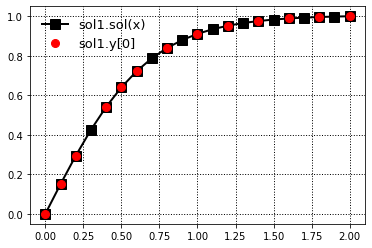

In [15]:
x = np.linspace(0, 2, 21)
plt.plot(x, sol1.sol(x)[0], 'ks-', lw=2, ms=10, label="sol1.sol(x)")
plt.plot(sol1.x, sol1.y[0], 'ro',  lw=2, ms=8,  label="sol1.y[0]")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

## Some Examples Using `solve_bvp` Solver

다음 논문에 나온 Matlab의 `bvp4c`에 대한 예제를 `scipy`의 `solve_bvp`를 이용해 구현하였다. 

> (Ref.) J. Kierzenka, L. F. Shampine, “A BVP Solver Based on Residual Control and the Maltab PSE”, ACM Trans. Math. Softw., Vol. 27, Number 3, pp. 299-316, 2001.

**[Example] ODE's with periodic boundary conditions**

Solve
\begin{align*}
\frac{dy_1}{dt} &= \mu - \beta(t) y_1 y_3 \\
\frac{dy_2}{dt} &= \beta(t) y_1 y_3 - \frac{y_2}{\lambda} \\
\frac{dy_3}{dt} &= \frac{y_2}{\lambda} - \frac{y_3}{\eta}
\end{align*}
where $\beta(t) = 1575(1+\cos2\pi t)$ and the constants are given as $\mu=0.02$, $\lambda=0.0279$ and $\eta = 0.01$. The solution is to satisfy the periodici conditions, $y(0) = y(1)$.

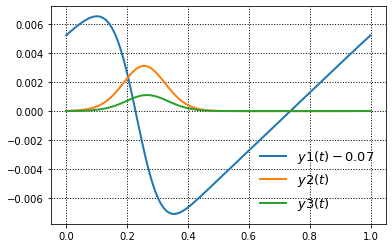

In [16]:
def fun(t, u):
    beta = 1575*(1 + np.cos(2*np.pi*t))
    y1, y2, y3 = u
    return mu - beta*y1*y3, beta*y1*y3 - y2/lam, y2/lam - y3/eta

def bc(ua, ub):
    return ua[0] - ub[0], ua[1] - ub[1], ua[2] - ub[2]

mu, lam, eta = 0.02, 0.0279, 0.01
x0 = np.linspace(0, 1, 101) # Mesh
u0 = np.zeros((3, x0.size))  # Solution
u0[0,0], u0[1,0], u0[2,0] = 0.01, 0.01, 0.01 # Initial guess

sol = integrate.solve_bvp(fun, bc, x0, u0)
plt.plot(sol.x, sol.y[0]-0.07, lw=2, label="$y1(t)-0.07$")
plt.plot(sol.x, sol.y[1], lw=2, label="$y2(t)$")
plt.plot(sol.x, sol.y[2], lw=2, label="$y3(t)$")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

**[Example] Flow in a long vertical channel**

Solve
\begin{align*}
f''' - R\left[(f')^2 - f\,f''\right] + R\,A &= 0 \\
h'' + R\,f\,h' + 1 &= 0 \\
\theta'' + P\,f\,\theta' &= 0
\end{align*}
where $R$ is Reynolds number and $P = 0.7R$. The parameter $A$ is unkonwn. 

Because of the presence of the unknown scalar $A$, there are 8 boundary conditions:
\begin{align*}
f(0)=f'(0)=0,\quad f(1)=1,\quad f'(1)=1 \\
h(0)=h(1)=0,\quad \theta(0)=0,\quad \theta(1)=1
\end{align*}

A = 2.7606


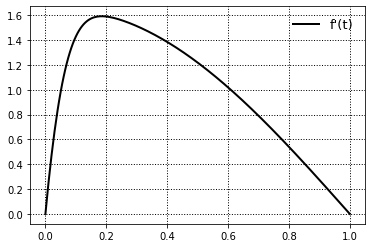

In [17]:
def fun(x, u, p):
    f, df, d2f, h, dh, t, dt = u; A = p[0]
    d3f = R*(df**2 - f*d2f - A)
    d2h = -R*f*dh - 1
    d2t = -P*f*dt
    return df, d2f, d3f, dh, d2h, dt, d2t

def bc(ua, ub, p):
    return ua[0], ua[1], ub[0] - 1, ub[1], ua[3], ub[3], ua[5], ub[5] - 1

R, P = 100, 70
x0 = np.linspace(0, 1, 101) # Mesh
u0 = np.zeros((7, x0.size))  # Solution
sol = integrate.solve_bvp(fun, bc, x0, u0, p=[1.0]) # Initial guess p = 1.0
print("A = %.4f" % sol.p[0])

plt.plot(sol.x, sol.y[1], 'k', lw=2, label="f'(t)")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

**[Example 3] The shock layer problem**

Solve
$$\epsilon y'' + xy' = -\epsilon\pi^2 \cos\pi x - \pi x\sin\pi x$$
with boundary conditions $y(-1) = -2$ and $y(1) = 0$ for $\epsilon=10^{-3}, 10^{-4}, 10^{-5}$.

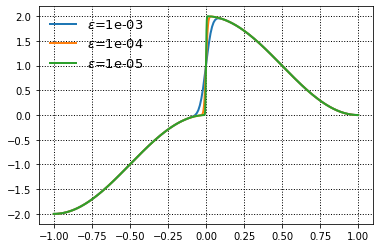

In [18]:
from numpy import pi, cos, sin

def fun(x, u, eps):
    y, dy = u
    return dy, -(x*dy + eps*pi**2*cos(pi*x) + pi*x*sin(pi*x))/eps

def bc(ya, yb):
    return ya[0] + 2, yb[0]

x0 = np.linspace(-1, 1, 101) # Mesh
u0 = np.zeros((2, x0.size))   # Solution

for eps in (1e-3, 1e-4, 1e-5):
    sol = integrate.solve_bvp(lambda x, u: fun(x, u, eps), bc, x0, u0)
    plt.plot(sol.x, sol.y[0], lw=2, label="$\epsilon$=%.e" % eps)

plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

**[Example]  Bratu’s problem**

Solve
$$y'' + k\exp(y) = 0,\quad y(0) = y(1) = 0$$
with $k = 1$.

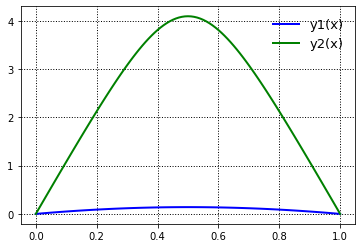

In [19]:
def fun(x, u):
    y, dy = u
    return dy, -np.exp(y)

def bc(ua, ub):
    return ua[0], ub[0]

x0 = np.linspace(0, 1, 11)
u1 = np.zeros((2, x0.size))
u2 = np.zeros((2, x0.size)); u2[0] = 3

sol1 = integrate.solve_bvp(fun, bc, x0, u1)
sol2 = integrate.solve_bvp(fun, bc, x0, u2)

x = np.linspace(0, 1, 101)
plt.plot(x, sol1.sol(x)[0], 'b', lw=2, label="y1(x)")
plt.plot(x, sol2.sol(x)[0], 'g', lw=2, label="y2(x)")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)

**[Example 5] BVP with unknown parameters**

Solve
$$y'' + k^2 y = 0,\quad y(0) = y(1) = 0$$
It is known that a non-trivial solution $y = A\sin kx$ is possible for $k = \pi n$, where $n$ is an integer. To establish the normalization constant $A = 1$ we add a boundary condition:
$$y'(0) = k$$

k = 6.2833


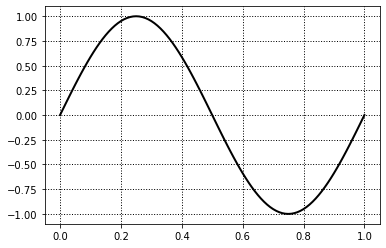

In [20]:
def fun(x, u, p):
    y, dy = u; k = p[0]
    return dy, -k**2*y

def bc(ua, ub, p):
    k = p[0]
    return ua[0], ub[0], ua[1] - k

x0 = np.linspace(0, 1, 5)   # Mesh
u0 = np.zeros((2, x0.size)) # Solution
u0[0,1] = 1; u0[0,3] = -1   # Initial guess
sol = integrate.solve_bvp(fun, bc, x0, u0, p=[6])
print("k = %.4f" % sol.p[0])

x = np.linspace(0, 1, 101)
plt.plot(x, sol.sol(x)[0], 'k', lw=2)
plt.grid(color='k', ls=':', lw=1)

## Initial Value Problems

`solve_bvp`는 `solve_ivp` 처럼 초기치 문제도 풀 수 있다.

**[Example 6] 2nd order ordinary differential equation**

Solve
$$m\frac{d^2 x}{dt^2} + c\frac{dx}{dt} + kx = 0$$
with initial conditions of $x(0)=1$ and $x'(0)=0$ with $m=20$, $k=20$ over $0\le t\le 15$.

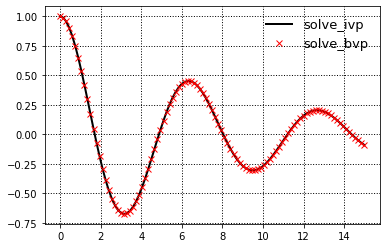

In [21]:
# IVP Solver: solve_ivp vs. solve_bvp
def fun(t, u, c, m=20, k=20):
    x, dx = u
    d2x = -(c/m)*dx -(k/m)*x
    return dx, d2x

def bc(ua, ub):
    return ua[0] - 1, ua[1]

t0 = np.linspace(0, 15, 21)
sol1 = integrate.solve_ivp(fun, [0, 15], [1, 0], args=(5,),
                           t_eval=t0, dense_output=True)

u0 = np.zeros((2, t0.size))
sol2 = integrate.solve_bvp(lambda t, u: fun(t, u, c=5), bc, t0, u0)

t = np.linspace(0, 15, 101)
plt.plot(t, sol1.sol(t)[0], 'k', lw=2, label="solve_ivp")
plt.plot(t, sol2.sol(t)[0], 'rx', lw=2, label="solve_bvp")
plt.legend(fontsize=13, frameon=False)
plt.grid(color='k', ls=':', lw=1)